# Load the dataset

Please select these five files: u.data u.genre, u.item, u.occupation, and u.user


In [32]:
# from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

#dataset = files.upload() # upload local files


In [33]:
# load the movie rating data into a dataframe
rating_header = ["user_id", "item_id", "rating", "timestamp"]
rating = pd.read_csv("u.data", sep = '\t', header = None, names=rating_header)

In [34]:
rating.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [35]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [36]:
# load the user data into a dataframe
user_header = ["user_id", "age", "gender", "occupation", "zip_code"]
users = pd.read_csv("u.user", sep = '|', header = None, names=user_header)

In [37]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [38]:
users.loc[users['zip_code'] == 'T8H1N']

,user_id,age,gender,occupation,zip_code
73,74,39,M,scientist,T8H1N
633,634,39,M,engineer,T8H1N


In [39]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [40]:
# load movie data into a dataframe
movie_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movies = pd.read_csv("u.item", sep = '|', header = None, encoding = 'latin1', names = movie_header)

In [41]:
# remove the video release date (no values)
movies = movies.drop(columns=['video_release_date'])
movies.head()

,item_id,title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   item_id       1682 non-null   int64 
 1   title         1682 non-null   object
 2   release_date  1681 non-null   object
 3   IMDb_URL      1679 non-null   object
 4   unknown       1682 non-null   int64 
 5   Action        1682 non-null   int64 
 6   Adventure     1682 non-null   int64 
 7   Animation     1682 non-null   int64 
 8   Children's    1682 non-null   int64 
 9   Comedy        1682 non-null   int64 
 10  Crime         1682 non-null   int64 
 11  Documentary   1682 non-null   int64 
 12  Drama         1682 non-null   int64 
 13  Fantasy       1682 non-null   int64 
 14  Film-Noir     1682 non-null   int64 
 15  Horror        1682 non-null   int64 
 16  Musical       1682 non-null   int64 
 17  Mystery       1682 non-null   int64 
 18  Romance       1682 non-null   int64 
 19  Sci-Fi

# Data Transformation and Combination
Some ML approaches expect the data set with numerical values only, the following codes show how to convert catergorical data into numbers

In [43]:
# transfrom the users dataframe with numerical values (excluding zip_code)
users_num = users.copy()
users_num["gender"].replace(['F', 'M'],[0, 1], inplace=True) # replace F and M with 0 and 1, respectively

In [44]:
occupation = pd.read_csv("u.occupation", header = None)
occupation_list = occupation.values
users_num["occupation"].replace(occupation_list,list(range(0, len(occupation_list))), inplace=True)
users_num.head()

,user_id,age,gender,occupation,zip_code
0,1,24,1,19,85711
1,2,53,0,13,94043
2,3,23,1,20,32067
3,4,24,1,19,43537
4,5,33,0,13,15213


Data Group By:
The following codes show how to compute the average rating score for each movie item 

In [45]:
# data aggregation
average_rating = rating[["item_id", "rating"]].groupby("item_id", as_index=False).mean()  # average rating per movie
average_rating.sort_values("rating",ascending=False).head()

,item_id,rating
813,814,5.0
1598,1599,5.0
1200,1201,5.0
1121,1122,5.0
1652,1653,5.0


Merge Dataframes:
The following codes show how to merge two dataframes

In [46]:
# merge two dataframes (average_rating and movies)
pd.merge(average_rating, movies[["item_id", "title"]])

,item_id,rating,title
0,1,3.878319,Toy Story (1995)
1,2,3.206107,GoldenEye (1995)
2,3,3.033333,Four Rooms (1995)
3,4,3.550239,Get Shorty (1995)
4,5,3.302326,Copycat (1995)
...,...,...,...
1677,1678,1.000000,Mat' i syn (1997)
1678,1679,3.000000,B. Monkey (1998)
1679,1680,2.000000,Sliding Doors (1998)
1680,1681,3.000000,You So Crazy (1994)


# Analyze the user data

<AxesSubplot:>

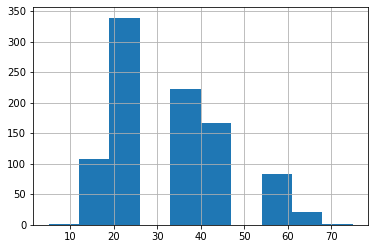

In [47]:
# age intervals distrubution
#users.hist(column="age")
users["age_category"] = pd.cut(users["age"], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80], labels=[5, 15, 25, 35, 45, 55, 65, 75])
users["age_category"].hist()


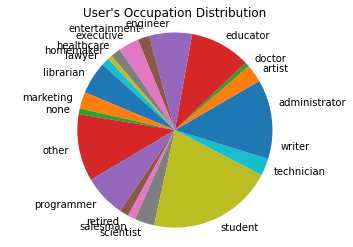

In [48]:
# occupation distrubution
occupation_count = users[["user_id", "occupation"]].groupby("occupation", as_index=False).size()  # count the numbers
plt.pie(occupation_count["size"], labels=occupation_count["occupation"])
plt.title("User's Occupation Distribution")
plt.axis("equal")
plt.show()

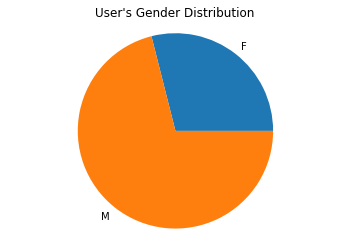

In [64]:
genderRate = users[["user_id", "gender"]].groupby("gender", as_index=False).size()  # count the numbers
plt.pie(genderRate["size"], labels=genderRate["gender"])
plt.title("User's Gender Distribution")
plt.axis("equal")
plt.show()

# Analyze the movie data

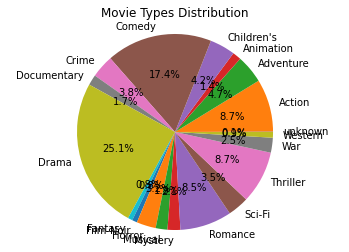

In [90]:
film = pd.read_csv('u.item', sep='|', encoding='ISO-8859-1')
film.columns = ['filmId', 'title', 'release date', 'video release date',
              'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
              'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama',
              'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
               'Sci-Fi', 'Thriller', 'War', 'Western']
columns = ['filmId', 'title', 'release date', 'video release date','IMDb URL']
labels = ['unknown', 'Action', 'Adventure', 'Animation',
              'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama',
              'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
               'Sci-Fi', 'Thriller', 'War', 'Western']
film = film.drop(columns, axis=1)
X = []
for column in film.columns:
    X.append(film[column].value_counts()[1])
plt.pie(X, labels = labels, autopct='%.1f%%')
plt.title("Movie Types Distribution")
plt.axis("equal")
plt.show()

In [49]:
# Clustering the movies by genre
genre = pd.read_csv("u.genre", sep = '|', header = None)
genre_list = genre[0].values
movie_set_genre = movies[genre_list]

非監督式學習的演算法，將一群資料分成k群(cluster)

2: 1785.4507001045156
3: 1492.9656052998405
4: 1350.192365485164
5: 1274.4955812268395
6: 1195.4433034928384
7: 1135.204415034539
8: 1043.0634318425748
9: 1032.2906389866887
10: 947.796074601095
11: 875.4419501454228
12: 831.0094258896319
13: 804.335637010949
14: 762.004916991392
15: 727.9657076742562
16: 696.7746239773134
17: 686.6329896250372
18: 661.0296182437734
19: 633.3188350481989
20: 609.8520133273119
21: 591.2713336933209
22: 578.9862920046365
23: 550.4089691695103
24: 539.3685779737177
25: 527.322843676177
26: 507.474055919905
27: 492.79858577165277
28: 482.87233644386475
29: 471.282206155291
30: 456.19140886436446
31: 454.4249357617977
32: 443.4202684954595
33: 434.8787236449181
34: 428.8016999640396
35: 415.0822715233366
36: 403.4446570245516
37: 389.44341077981187
38: 384.34733683605197
39: 384.64361368266276
40: 374.46702365809256
41: 363.74063426021814
42: 363.9321985614238
43: 350.77775040082895
44: 344.48962840867733
45: 336.2720534375473
46: 327.116453087843
47: 326.3

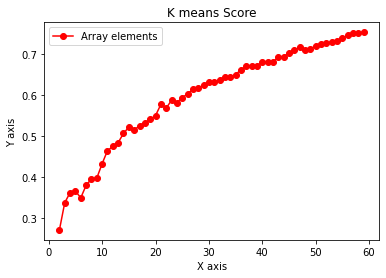

In [60]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt; 
from sklearn.metrics import silhouette_score
x = []
y = []
for i in range(2, 60):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit_predict(movie_set_genre)
    print(str(i) + ": " + str(kmeans.inertia_))
    x.append(i)
    y.append(silhouette_score(movie_set_genre, kmeans.labels_, metric='euclidean'))
    
    

plt.title("K means Score")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color = "red", marker = "o", label = "Array elements")
plt.legend()
plt.show()

In [26]:
#kmeans.inertia_
kmeans.inertia_

306.6277872583292

In [61]:
# compute the similarity between two movies
import scipy.spatial.distance as sp_dist
genre_array = movie_set_genre.to_numpy()

x = genre_array[1]
y = genre_array[2]
print(sp_dist.cosine(x,y))
print(sp_dist.euclidean(x,y))
print(sp_dist.jaccard(x,y))

0.42264973081037427
1.4142135623730951
0.6666666666666666


In [62]:
# compute the matrix of all pairwise distances of movies
import sklearn.metrics as metrics

distance_matrix = metrics.pairwise_distances(genre_array,metric = 'jaccard') # ‘cosine’, ‘euclidean’, etc
print(distance_matrix)

[[0.         1.         1.         ... 1.         0.66666667 1.        ]
 [1.         0.         0.66666667 ... 1.         1.         1.        ]
 [1.         0.66666667 0.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.         1.         0.5       ]
 [0.66666667 1.         1.         ... 1.         0.         1.        ]
 [1.         1.         1.         ... 0.5        1.         0.        ]]


D:\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
